In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
from utide import solve

In [23]:
from analysis_routines import *
from plotting_routines_xr import *
from harmonic_analysis import *
from wavelet_analysis import *
from processing_routines import datenum_to_epoch
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [24]:
chain_fit = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')

In [25]:
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G05 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)
delta05 = pd.read_csv(data_dir / 'SHDR_fit/aux/delta05_ci.csv', index_col='date', parse_dates=True)

In [35]:
date_1 = datetime(2018, 11, 16, 11)
date_2 = datetime(2018, 11, 24)
period = slice(date_1, date_2)

In [48]:
highcut = period_to_freq(2, 'h')
D1_lowpass = lowpass_filter(chain_fit.D1, data.date, 1/5, highcut)

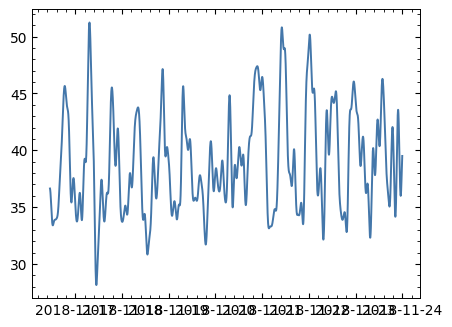

In [49]:
plt.plot(D1_lowpass[period])

In [50]:
a = coef_dataframe(D1_lowpass, period=[date_1, date_2])

In [51]:
a

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,91.158095,128.704266,4.365477,0.754208,4.469361,9.909215
M4,6.210301,4.186541,25.647270,0.935539,0.362074,10.194373,22.092963
M3,8.280401,2.305254,16.274274,0.694214,0.337286,132.621474,27.847161
K1,23.934470,1.208694,8.589521,0.502681,0.336174,330.946193,38.358372
M8,3.105150,0.445158,12.073537,0.305064,0.172080,11.681161,32.359115
2SK5,4.797373,0.250000,0.902715,0.228615,0.471612,182.772074,117.846360
2MK5,4.930880,0.187303,0.679432,0.197882,0.470532,297.395101,136.461451
3MK7,3.529641,0.165621,1.277969,0.186076,0.322617,264.669504,99.183078
M6,4.140200,0.093335,1.648801,0.139687,0.213221,187.231794,87.242808


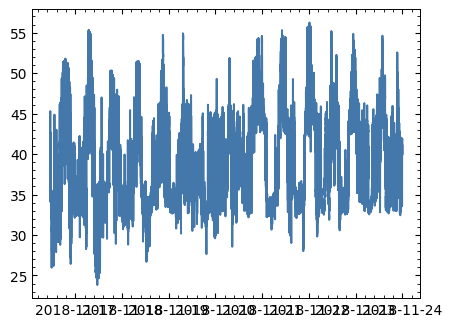

In [38]:
plt.plot(chain_fit.D1[period])